In [87]:
import torch
import cv2
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.tensorboard import SummaryWriter
import os
import numpy as np
import shutil
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [7]:
# sampleSubmissionUrl = 'https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/sampleSubmission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1641707019&Signature=XxHTsC617Jgc%2FcYJS6Fh8zZDGy1D%2FhYhp535LKQ5yy%2BaD4dbFuPbXGtLViiGIK2OMTrGFCZNRrSxbasDFO2bG3ZEAqkoj3wvfZk53l6z5ulc0gmisVd5jX71zzjp7X%2Fn1Fbr6%2FCvfvIGOmkTuk4FKOxYKOl5KeJe2IrTngIK3wUZ0Yb2BEmt794kt29wKntIMBJN0DUYQLsB9VaIavx5FnY3Njv78HugzYzuXGLrFmp%2Fe5tqLSjz154qPo3rzuZy42zvRrY005iGV5w4qv4SVEYiBKjP1tbqpF7DIJbHNPUSNwN7rdhbc3xH5O1h6nPfXV%2Brj9XfIMwvnYTo7z0yNg%3D%3D&response-content-disposition=attachment%3B+filename%3DsampleSubmission.csv'
# trainDataUrl = 'https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1641707115&Signature=WefqSFIkJ6qJ2ldNKyE%2Fx6G0AxPPjFOmtCC7O6zjY9OJqQATQwbOFX0FUvrK9UP1qv4fka5hxEaE4FBHWHqwQlZhQTWpUBQZbR4%2F29PkWypJTBGLstQEInrfZRU42u6gGu1ZVB9Cn6pfosbThl9nh6UPjbsYzvqjpx0GQh9CI8GaWaX1VERS957INc25mOtjPf7lTfqpluKb%2FH1q4YpWCtcjO0vLi%2FARb%2BoMsS3z33RWDsooGghV%2FWzc896SDX79pcwKgHd%2Bk5DXtdSHNYtxHB2HiyD5bzHBkIJ0vDN7JJBiQMzWQPQeeqe7HthRaGYGEkac6M2UaRyMaJeX3ikylQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'
# testDataUrl = 'https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/test1.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1641707027&Signature=bmQWPceS%2FhM1aDp7NFozfKJeFft3%2FyEMxi9y6nLCE%2FGP4YnoV3I8dMiswhfSWlgK6DmPwaWEDR9xOJ9dU7%2FlX4D7W6WqlTd9cGnD%2FpU4auOLaAV1fcpi6iGpWmbRjYxtV3ZTqJNsE8UgfILhd5L02%2FLOGLTCRF70Vp8JCxjXYB1T0Ww1CpxNgQKrXq1b%2Bs8E8JDXausZ2ZwqbTbcIi6oK5xqABZdEtXyZPliYljQdm4GEAlfoaJRuZoq6J8S2wfucFLytuAPWTZJb9Mcr1VlXPw4k2QshTPL1UrmpPnCATxCLNSk%2FB4SyUK9eJI1Dywvio%2FCoQfVZADVrWesuePo4g%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest1.zip'

In [8]:
# !wget {sampleSubmissionUrl} --directory-prefix=data

In [3]:
logWriter = SummaryWriter("runs")

In [5]:
transformTrain = transforms.Compose([
    transforms.ToTensor
])

transformTest = transforms.Compose([
    transforms.ToTensor
])

In [44]:
dataSetFileNames = os.listdir('data/train')
dataSetLen = len(os.listdir('data/train'))
testRatio = 0.2
testLen = int(testRatio * dataSetLen)

In [19]:
os.mkdir('data/test')

In [38]:
idx = np.arange(dataSetLen)

In [39]:
np.random.shuffle(idx)

In [41]:
testIdx = idx[ : testLen]

In [53]:
for i in testIdx :
    currFilePath = 'data/train/' + dataSetFileNames[i]
    newFilePath = 'data/test/' + dataSetFileNames[i]
    shutil.copyfile(currFilePath, newFilePath)
    os.remove(currFilePath)

In [58]:
len([True for x in os.listdir('data/train') if x[0 : 3] == 'dog'])

9970

In [103]:
class Dataset(Dataset) :
    def __init__(self, PATH) : 
        self.PATH = PATH
        self.fileNames = os.listdir(self.PATH)
    
    def __getitem__(self, idx):
        image_bgr = cv2.imread(self.PATH + '/' + self.fileNames[idx])
        image_rgb = image_bgr[ : , : , ::-1]
        return image_rgb
    
    def __len__(self) : 
        return len(self.fileNames)

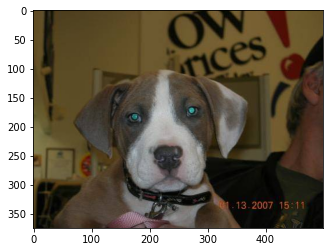

In [105]:
trainSet = Dataset('data/train')
testSet = Dataset('data/test')
plt.imshow(testSet[1])

In [ ]:
batchSize = 16
trainLoader = DataLoader(dataset = trainSet, batch_size = batchSize, shuffle = True)
testLoader = DataLoader(dataset = testSet, batch_size = batchSize, shuffle = True)